In [ ]:
!apt-get install -y graphviz graphviz-dev
!pip install --no-cache-dir pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import seaborn as sns

In [56]:
# Cargar dataset de ejemplo
df = pd.read_csv("red_citas_dummy.csv")

In [57]:
# Preprocesamiento
## Convertir nombres a minúsculas y eliminar espacios
for col in ["Persona_A", "Persona_B"]:
    df[col] = df[col].str.strip().str.lower()

In [58]:
# Preprocesamiento
## Convertir nombres a minúsculas y eliminar espacios
for col in ["Persona_A", "Persona_B"]:
    df[col] = df[col].str.strip().str.lower()

In [59]:
df

,Persona_A,Persona_B,Fecha
0,olegario cazorla haro,patricia cuadrado sandoval,2024-12-26
1,mariana del barrena,martin díez nicolau,2024-07-15
2,isaías prat,luciano mayoral barral,2024-12-27
3,trini osuna jove,jovita aguilar badía,2025-03-02
4,oriana gilabert cámara,aitana salinas ribas,2024-08-28
...,...,...,...
95,zoraida español-poza,isaías prat,2025-01-22
96,jose ramón tomás arellano,cirino campo arco,2024-10-06
97,mariana del barrena,amarilis arnal,2025-01-08
98,antonio aroca cortina,cirino campo arco,2024-11-06


In [60]:
# Crear el grafo
G = nx.from_pandas_edgelist(df, "Persona_A", "Persona_B", create_using=nx.DiGraph())

In [61]:
# Exploración de Datos (EDA)
print("Número de nodos:", G.number_of_nodes())
print("Número de enlaces:", G.number_of_edges())
print("Densidad de la red:", nx.density(G))

Número de nodos: 49
Número de enlaces: 98
Densidad de la red: 0.041666666666666664


In [62]:
# 1. Get a list of all authors (nodes in the graph)
all_authors = list(G.nodes())

# 2. Calculate in-degree (citation frequency) for each author
citation_frequency = dict(G.in_degree())

# 3. Create a Pandas DataFrame
author_citation_df = pd.DataFrame({
    "Autor": all_authors,
    "Frecuencia de Citas": [citation_frequency[author] for author in all_authors]
})

# 4. Sort by citation frequency (descending)
author_citation_df = author_citation_df.sort_values(by=["Frecuencia de Citas"], ascending=False)

# 5. Display the table
print(author_citation_df)

                                Autor  Frecuencia de Citas
1          patricia cuadrado sandoval                    6
20   roque florentino gálvez paniagua                    6
23                    manola de camps                    4
27               jennifer tena benito                    4
4                         isaías prat                    4
15            máximo glauco cal marti                    4
18               inmaculada morán mas                    3
17          jose ramón tomás arellano                    3
30          josé maría granados-seguí                    3
13                  cirino campo arco                    3
32  néstor hermenegildo belda urrutia                    3
24             domingo flores alberdi                    3
9                aitana salinas ribas                    3
7                jovita aguilar badía                    3
5              luciano mayoral barral                    3
3                 martin díez nicolau                   

In [63]:
import networkx as nx
import matplotlib.pyplot as plt

In [75]:
df

,Persona_A,Persona_B,Fecha
0,olegario cazorla haro,patricia cuadrado sandoval,2024-12-26
1,mariana del barrena,martin díez nicolau,2024-07-15
2,isaías prat,luciano mayoral barral,2024-12-27
3,trini osuna jove,jovita aguilar badía,2025-03-02
4,oriana gilabert cámara,aitana salinas ribas,2024-08-28
...,...,...,...
95,zoraida español-poza,isaías prat,2025-01-22
96,jose ramón tomás arellano,cirino campo arco,2024-10-06
97,mariana del barrena,amarilis arnal,2025-01-08
98,antonio aroca cortina,cirino campo arco,2024-11-06


In [67]:
# 1. Obtener personas citadas por Persona_A y Persona_B
person_a_cited = df[df["Persona_A"] == "person_a"]["Persona_B"].unique().tolist()
person_b_cited = df[df["Persona_A"] == "person_b"]["Persona_B"].unique().tolist()

In [68]:
# 2. Asignar colores a los nodos
node_colors = []
for node in G.nodes():
    if node in person_a_cited and node in person_b_cited:
        node_colors.append("purple")  # Citado por ambos
    elif node in person_a_cited:
        node_colors.append("red")     # Citado por Persona_A
    elif node in person_b_cited:
        node_colors.append("blue")    # Citado por Persona_B
    else:
        node_colors.append("lightgray") # No citado por ninguno

In [70]:
print(list(G.nodes()))  # Imprime los nombres de los nodos en el grafo

['olegario cazorla haro', 'patricia cuadrado sandoval', 'mariana del barrena', 'martin díez nicolau', 'isaías prat', 'luciano mayoral barral', 'trini osuna jove', 'jovita aguilar badía', 'oriana gilabert cámara', 'aitana salinas ribas', 'anabel cánovas-mur', 'mamen de linares', 'rosa maría llorente', 'cirino campo arco', 'bruno jose ramón neira alcalde', 'máximo glauco cal marti', 'quique atienza miranda', 'jose ramón tomás arellano', 'inmaculada morán mas', 'roque bauzà batlle', 'roque florentino gálvez paniagua', 'amarilis arnal', 'luis ángel zabaleta tejera', 'manola de camps', 'domingo flores alberdi', 'obdulia vergara vila', 'miriam iris gisbert chaves', 'jennifer tena benito', 'celestino soria morán', 'zoraida español-poza', 'josé maría granados-seguí', 'soraya tejada', 'néstor hermenegildo belda urrutia', 'antonio aroca cortina', 'gervasio boada paz', 'carolina estrella roda gálvez', 'cándido mateos alcalá', 'segismundo coronado calvo', 'juan carlos rocamora gutierrez', 'claudio

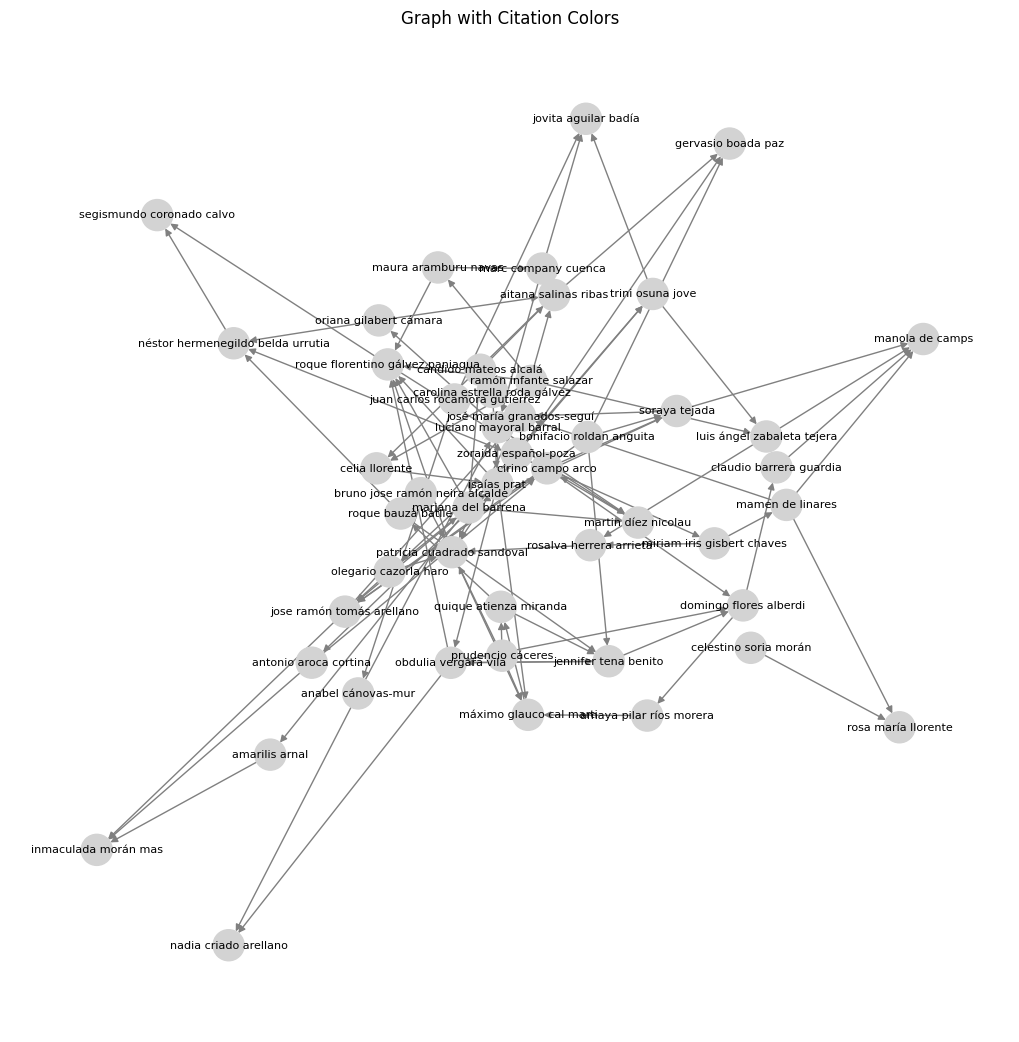

In [69]:
# 3. Visualizar el grafo (con la distribución ajustada)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5, iterations=100)  # Ajusta k e iterations si es necesario

nx.draw(G, pos, with_labels=True, node_color=node_colors,
        node_size=500, font_size=8, edge_color="gray")

plt.title("Graph with Citation Colors")
plt.show()

In [76]:
# 1. Obtener personas citadas por cualquier 'Persona_A'
personas_citadas_por_A = df["Persona_B"].unique().tolist()

# 2. Obtener personas que citaron (que aparecen en 'Persona_A')
personas_que_citaron_A = df["Persona_A"].unique().tolist()

# 3. Imprimir las listas
print("Personas citadas por cualquier 'Persona_A':", personas_citadas_por_A)
print("Personas que citaron (aparecen en 'Persona_A'):", personas_que_citaron_A)

Personas citadas por cualquier 'Persona_A': ['patricia cuadrado sandoval', 'martin díez nicolau', 'luciano mayoral barral', 'jovita aguilar badía', 'aitana salinas ribas', 'oriana gilabert cámara', 'rosa maría llorente', 'cirino campo arco', 'quique atienza miranda', 'inmaculada morán mas', 'roque bauzà batlle', 'manola de camps', 'domingo flores alberdi', 'obdulia vergara vila', 'miriam iris gisbert chaves', 'jennifer tena benito', 'olegario cazorla haro', 'trini osuna jove', 'mariana del barrena', 'néstor hermenegildo belda urrutia', 'antonio aroca cortina', 'gervasio boada paz', 'cándido mateos alcalá', 'segismundo coronado calvo', 'josé maría granados-seguí', 'isaías prat', 'nadia criado arellano', 'marc company cuenca', 'rosalva herrera arrieta', 'mamen de linares', 'máximo glauco cal marti', 'anabel cánovas-mur', 'jose ramón tomás arellano', 'amaya pilar ríos morera', 'roque florentino gálvez paniagua', 'soraya tejada', 'zoraida español-poza', 'claudio barrera guardia', 'luis áng

In [77]:
!apt-get install -y graphviz graphviz-dev
!pip install --no-cache-dir pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [78]:
import networkx as nx
import matplotlib.pyplot as plt

In [79]:
G = nx.from_pandas_edgelist(df, "Persona_A", "Persona_B", create_using=nx.DiGraph())

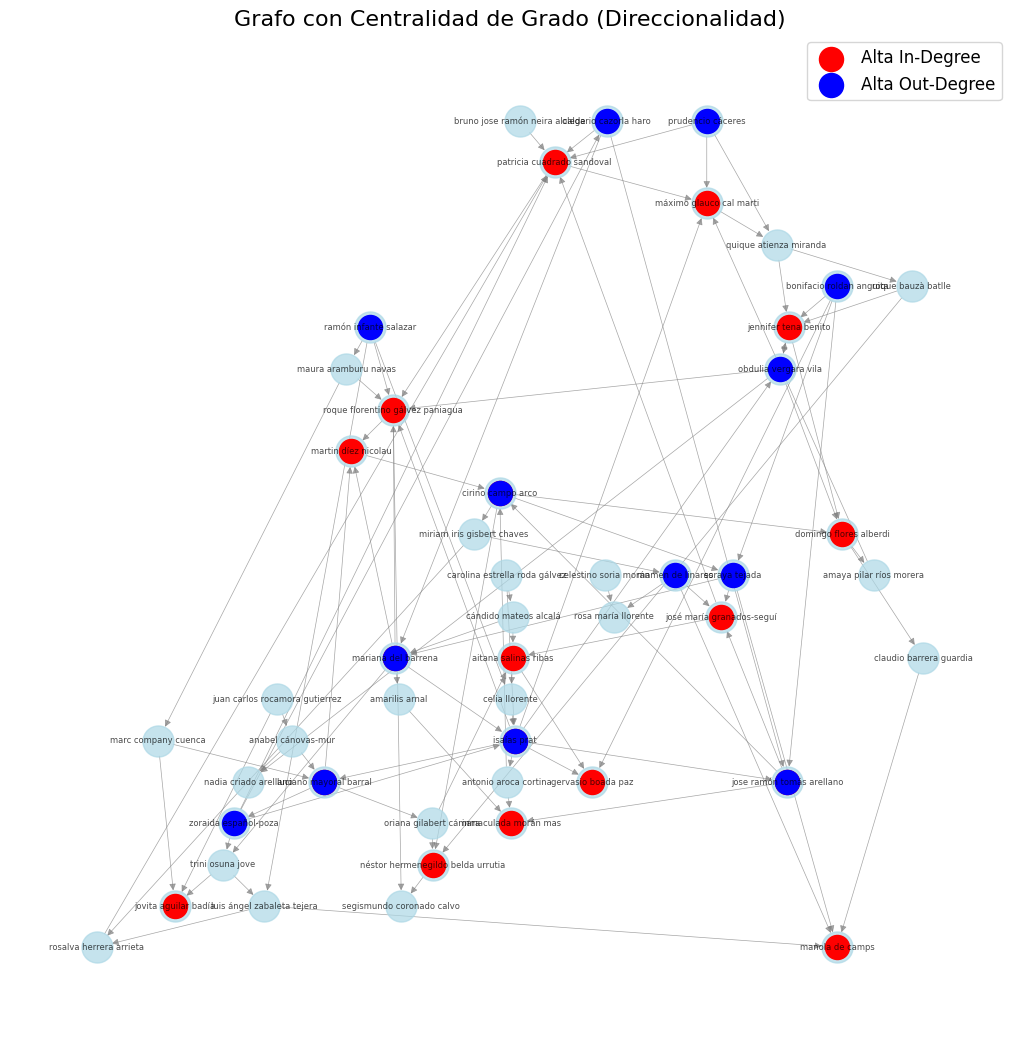

In [80]:
# 1. Apply Harel-Koren-inspired layout using Graphviz
# We'll use the 'dot' engine, known for hierarchical layouts
try:
    pos_harel = nx.nx_agraph.graphviz_layout(G, prog="dot")
except ImportError:
    print("Error: Graphviz and pygraphviz are required for the Harel-Koren layout. Install them using:\n!apt install graphviz\n!pip install pygraphviz")
    # Fallback to spring layout if Graphviz is not installed
    pos_harel = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# 2. Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos_harel, with_labels=True,
        node_size=500, node_color="lightblue", edge_color="gray",
        font_size=6, width=0.5, alpha=0.7)

# Highlight nodes with high in-degree and out-degree
nx.draw_networkx_nodes(G, pos_harel, nodelist=[n for n, d in in_degree.items() if d > 2], node_color='red', label='Alta In-Degree')
nx.draw_networkx_nodes(G, pos_harel, nodelist=[n for n, d in out_degree.items() if d > 2], node_color='blue', label='Alta Out-Degree')

plt.title("Grafo con Centralidad de Grado (Direccionalidad)", fontsize=16)
plt.legend(fontsize=12)
plt.xticks([])
plt.yticks([])
plt.show()

In [65]:
# Calcular el grado de cada nodo
degree_df = pd.DataFrame(G.degree, columns=["Nodo", "Grado"])

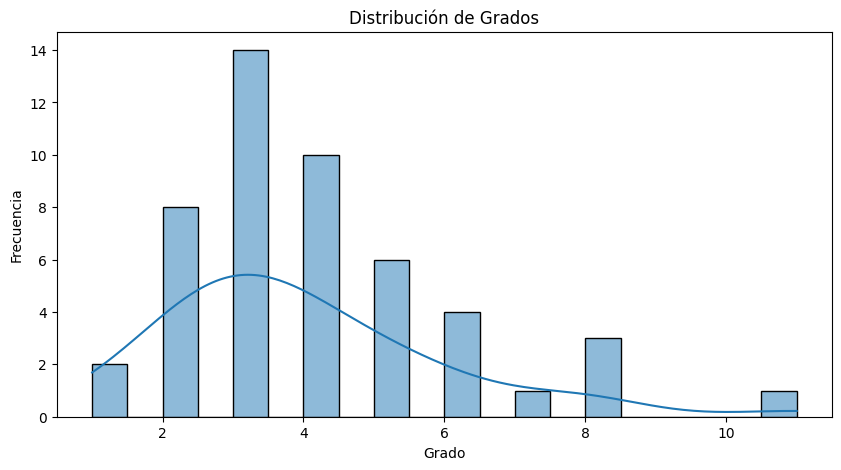

In [66]:
# Visualización de la distribución de grados
plt.figure(figsize=(10, 5))
sns.histplot(degree_df["Grado"], bins=20, kde=True)
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:

# Identificación de nodos clave
centrality = nx.degree_centrality(G)
centrality_df = pd.DataFrame(centrality.items(), columns=["Nodo", "Centralidad"])
print("Top 5 nodos con mayor centralidad:")
print(centrality_df.sort_values("Centralidad", ascending=False).head())


Top 5 nodos con mayor centralidad:
                                Nodo  Centralidad
4                        isaías prat     0.229167
2                mariana del barrena     0.166667
1         patricia cuadrado sandoval     0.166667
20  roque florentino gálvez paniagua     0.166667
13                 cirino campo arco     0.145833


In [ ]:
# Calcular medidas de centralidad
centrality_measures = {
    "Grado": nx.degree_centrality(G),
    "Cercanía": nx.closeness_centrality(G),
    "Intermediación": nx.betweenness_centrality(G),
    "Eigenvector": nx.eigenvector_centrality(G, max_iter=1000),
    "PageRank": nx.pagerank(G),
}
# Calcular medidas de centralidad
centrality_measures = {
    "Grado": nx.degree_centrality(G),
    "Cercanía": nx.closeness_centrality(G),
    "Intermediación": nx.betweenness_centrality(G),
    "Eigenvector": nx.eigenvector_centrality(G, max_iter=1000),
    "PageRank": nx.pagerank(G),
}

In [ ]:
# Convertir a DataFrame
centrality_df = pd.DataFrame(centrality_measures)
centrality_df = centrality_df.sort_values("Grado", ascending=False)

In [ ]:
# Mostrar las primeras filas
print("Top 5 nodos con mayor centralidad en cada métrica:")
print(centrality_df.head())


Top 5 nodos con mayor centralidad en cada métrica:
                                     Grado  Cercanía  Intermediación  \
isaías prat                       0.229167  0.166788        0.187980   
mariana del barrena               0.166667  0.156708        0.151485   
patricia cuadrado sandoval        0.166667  0.194019        0.107602   
roque florentino gálvez paniagua  0.166667  0.279616        0.179743   
cirino campo arco                 0.145833  0.214442        0.255208   

                                  Eigenvector  PageRank  
isaías prat                          0.095958  0.028537  
mariana del barrena                  0.079202  0.016947  
patricia cuadrado sandoval           0.162238  0.040794  
roque florentino gálvez paniagua     0.305970  0.040619  
cirino campo arco                    0.211747  0.040674  


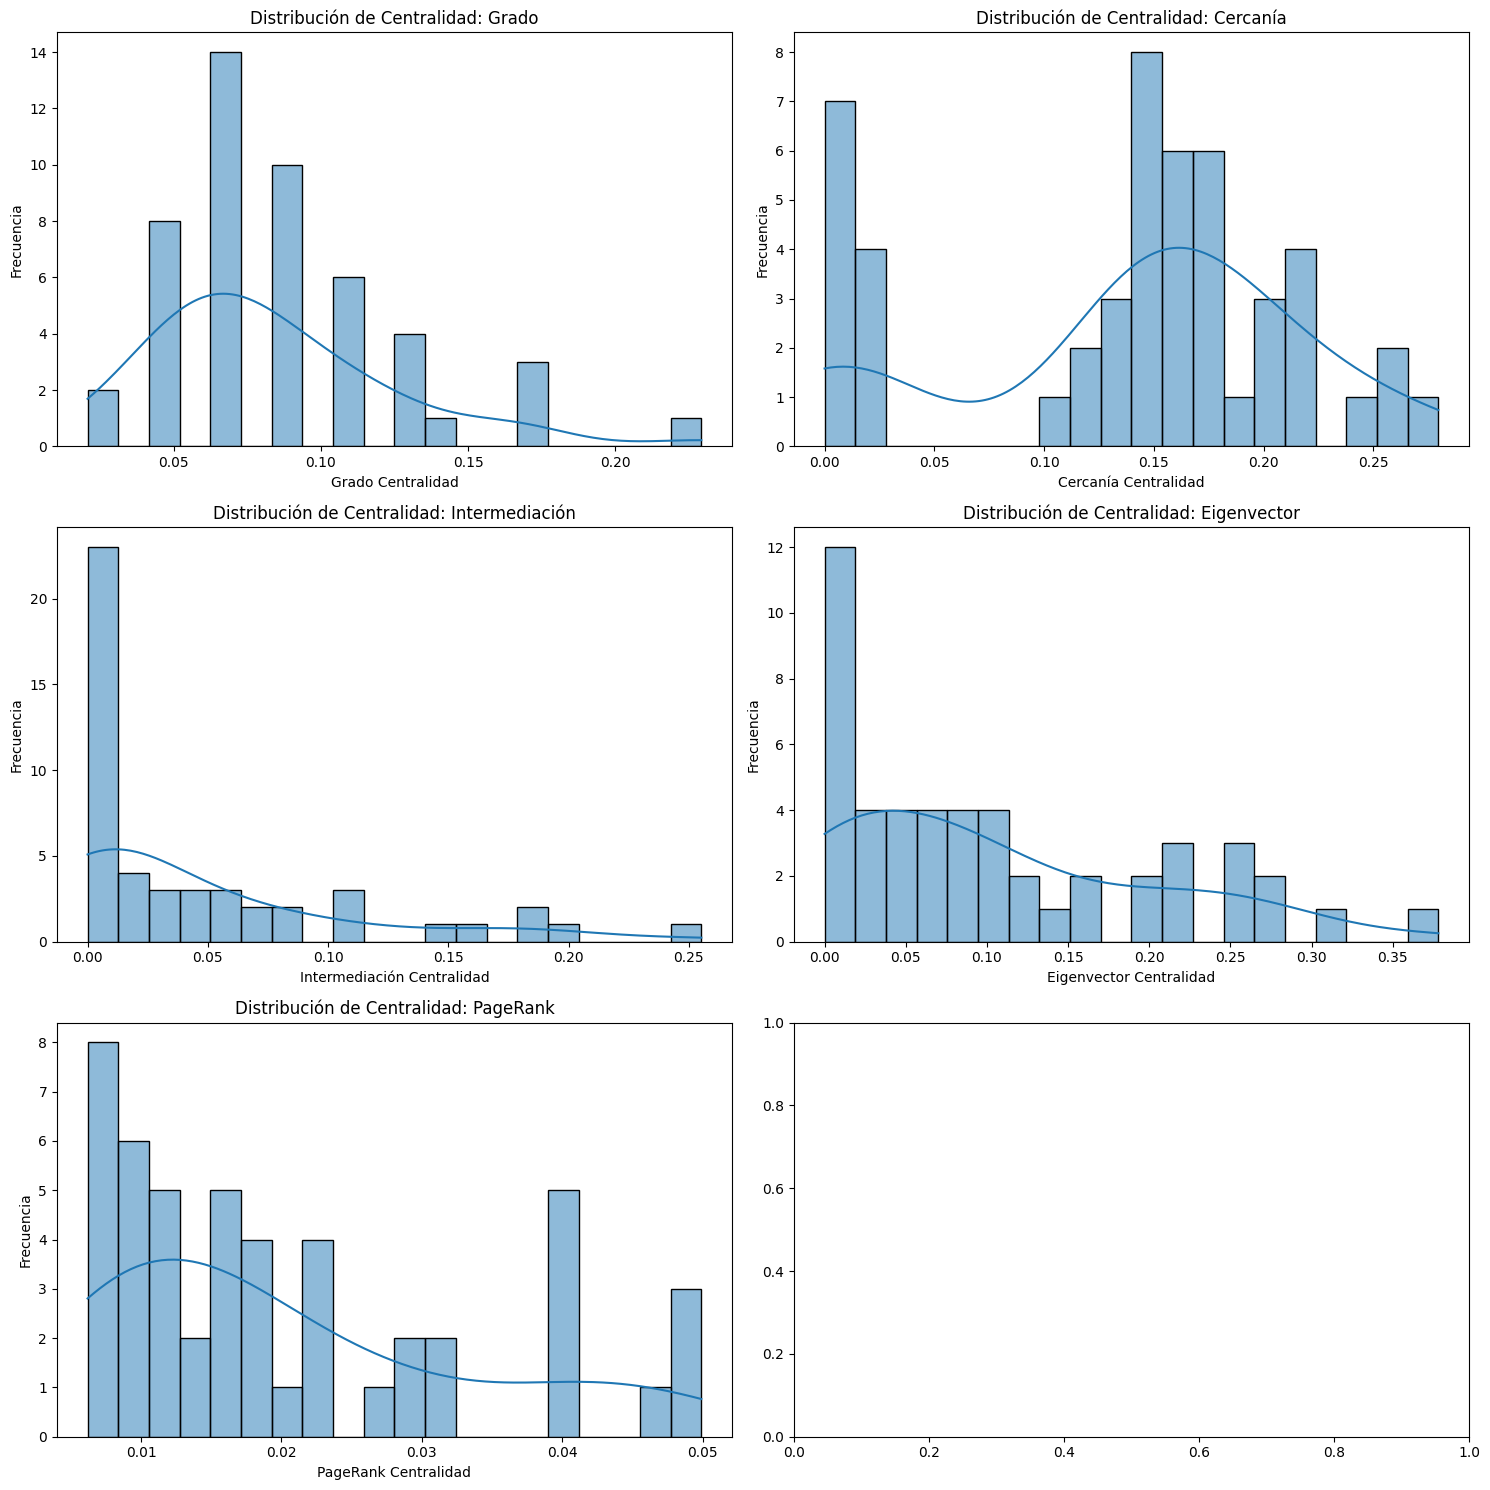

In [ ]:
# Generar gráficos para cada medida de centralidad
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (measure, values) in enumerate(centrality_measures.items()):
    sns.histplot(list(values.values()), bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de Centralidad: {measure}")
    axes[i].set_xlabel(f"{measure} Centralidad")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

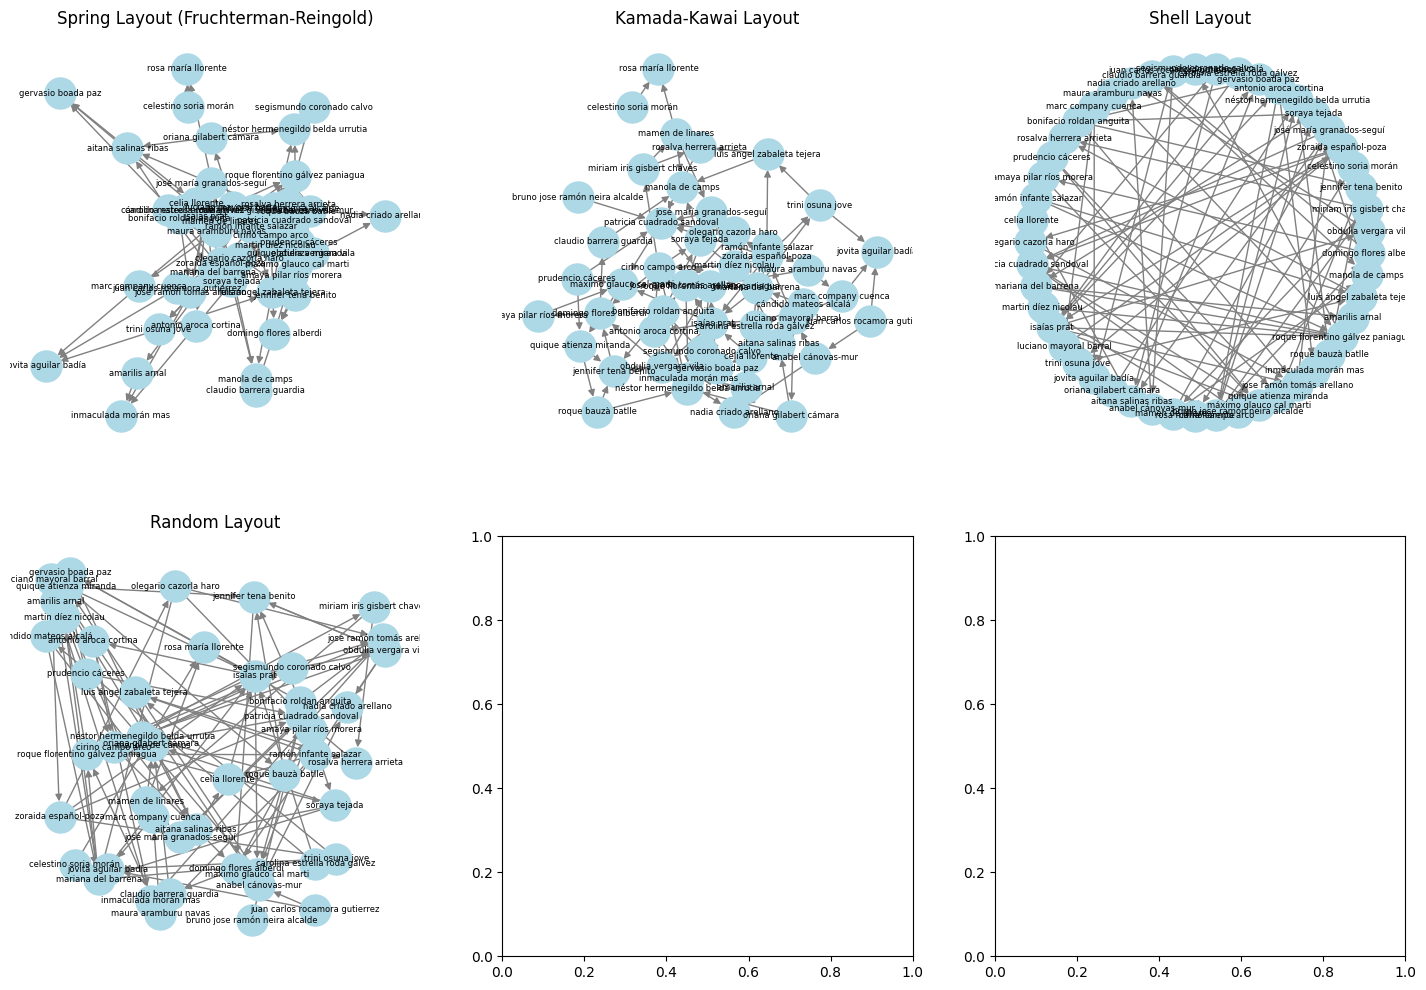

In [ ]:
# Configurar la figura con 6 gráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Diferentes disposiciones de grafos
layouts = {
    "Spring Layout (Fruchterman-Reingold)": nx.spring_layout(G, seed=42),
    "Kamada-Kawai Layout": nx.kamada_kawai_layout(G),
    "Shell Layout": nx.shell_layout(G),
    "Random Layout": nx.random_layout(G, seed=42),
}

# Dibujar los cuatro primeros
for ax, (title, pos) in zip(axes.flatten()[:4], layouts.items()):
    ax.set_title(title)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
            node_size=500, font_size=6, ax=ax)

In [ ]:
# Sugiyama Layout (usando Graphviz "dot")
try:
    pos_sugiyama = graphviz_layout(G, prog="dot")
    axes[1, 1].set_title("Sugiyama Layout (Graphviz)")
    nx.draw(G, pos_sugiyama, with_labels=True, node_color="lightblue", edge_color="gray",
            node_size=500, font_size=6, ax=axes[1, 1])
except:
    axes[1, 1].set_title("Sugiyama Layout - Error al cargar Graphviz")


In [ ]:
# Simulación de David Harel (una variante del Spring Layout)
pos_harel = nx.spring_layout(G, k=0.1, seed=42)  # Ajustando el parámetro k
axes[1, 2].set_title("David Harel (Simulación)")
nx.draw(G, pos_harel, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=500, font_size=6, ax=axes[1, 2])

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
# Crear el grafo dirigido
G = nx.from_pandas_edgelist(df, "Persona_A", "Persona_B", create_using=nx.DiGraph())

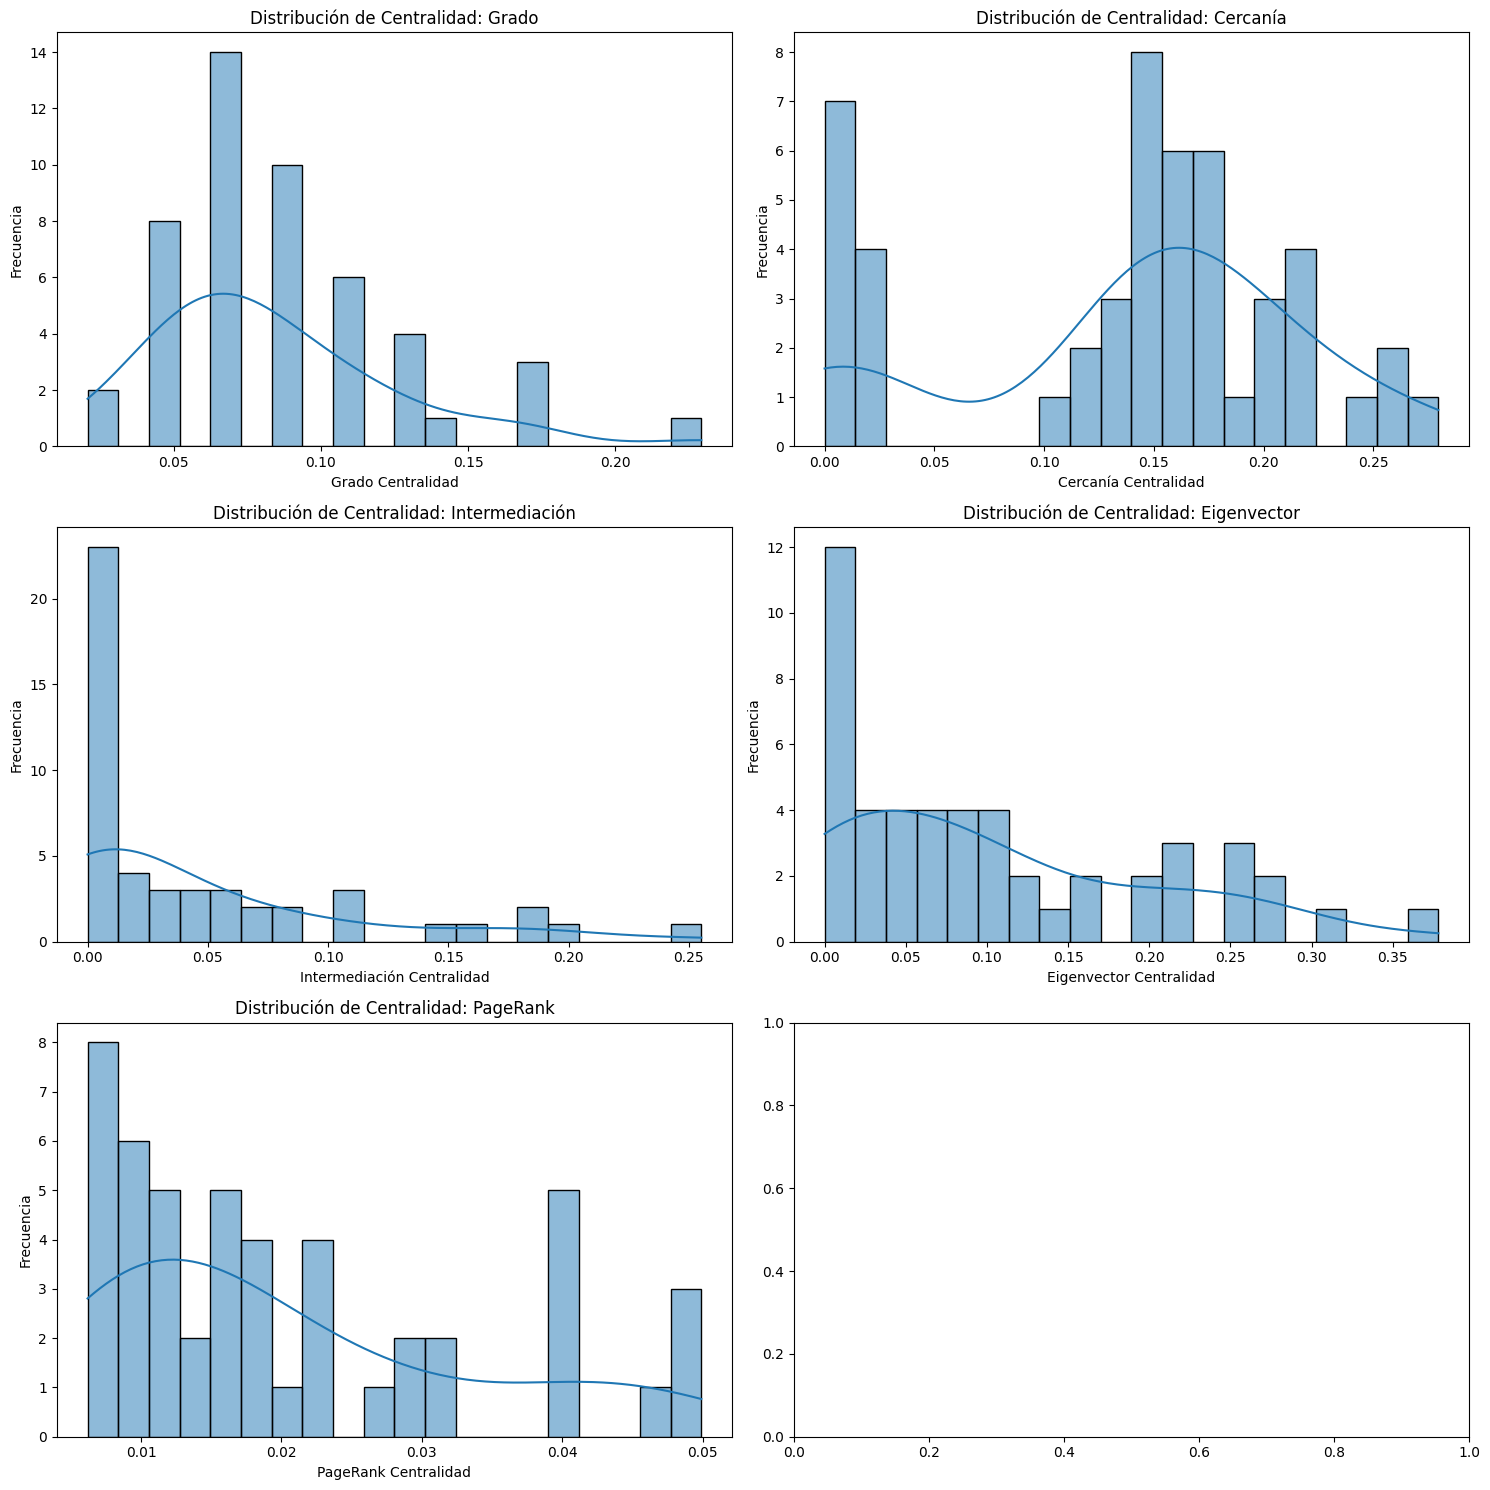

In [ ]:
# Generar gráficos para cada medida de centralidad
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (measure, values) in enumerate(centrality_measures.items()):
    sns.histplot(list(values.values()), bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de Centralidad: {measure}")
    axes[i].set_xlabel(f"{measure} Centralidad")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [ ]:
# Cálculo y visualización de centralidad de grado con direccionalidad
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())
intensity = {node: in_degree[node] + out_degree[node] for node in G.nodes()}

In [ ]:
# Crear un DataFrame con estas métricas
degree_centrality_df = pd.DataFrame({
    "Nodo": list(G.nodes()),
    "In-Degree": [in_degree[n] for n in G.nodes()],
    "Out-Degree": [out_degree[n] for n in G.nodes()],
    "Intensidad": [intensity[n] for n in G.nodes()]
})

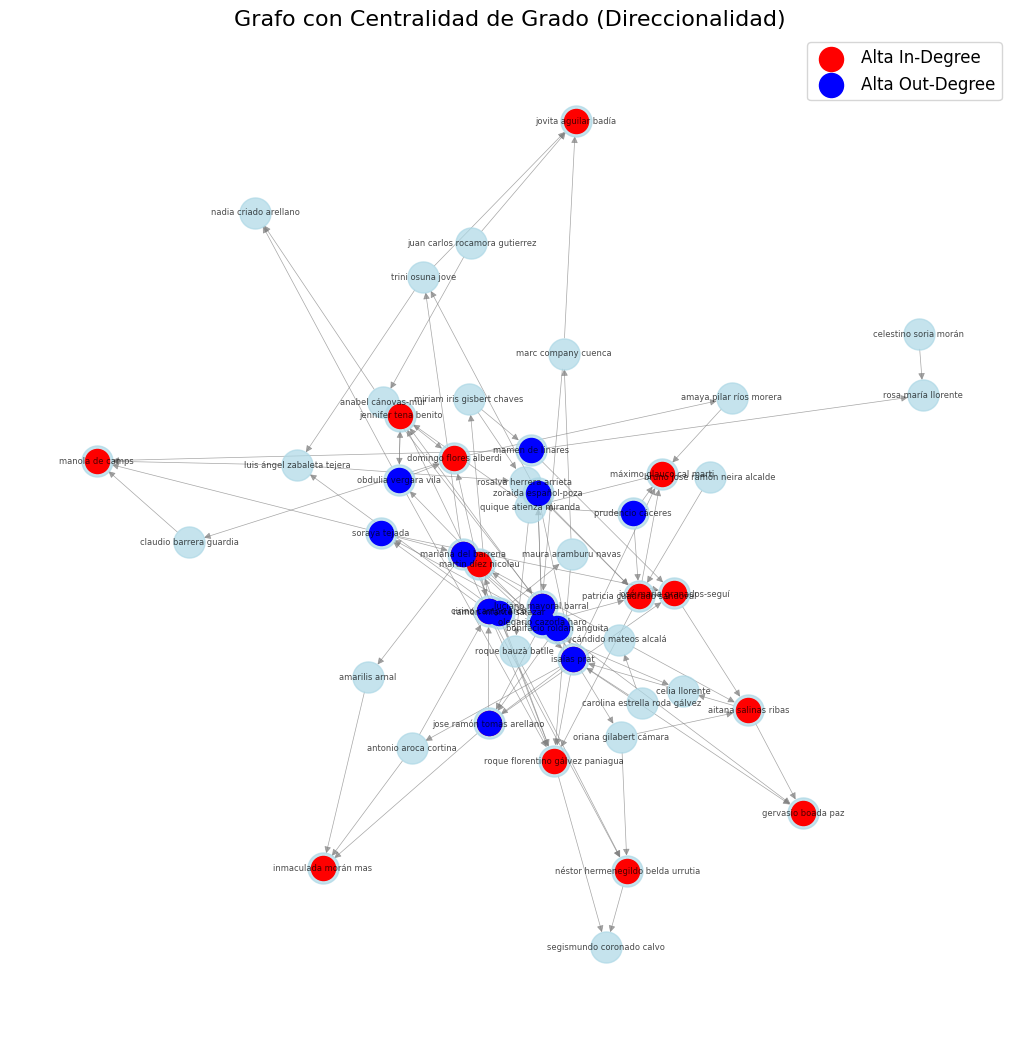

In [ ]:
# Visualización de los grafos
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.3, iterations=50)  # Adjust k and iterations for better spacing

# Draw the graph with adjustments
nx.draw(G, pos, with_labels=True,
        node_size=500,  # Reduced node size
        node_color="lightblue",
        edge_color="gray",
        font_size=6,  # Smaller font size for labels
        width=0.5,  # Thinner edges
        alpha=0.7)  # Slight transparency for nodes

# Highlight nodes with high in-degree and out-degree
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in in_degree.items() if d > 2], node_color='red', label='Alta In-Degree')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in out_degree.items() if d > 2], node_color='blue', label='Alta Out-Degree')

plt.title("Grafo con Centralidad de Grado (Direccionalidad)", fontsize=16)
plt.legend(fontsize=12)

# Remove axis ticks and labels
plt.xticks([])
plt.yticks([])

plt.show()

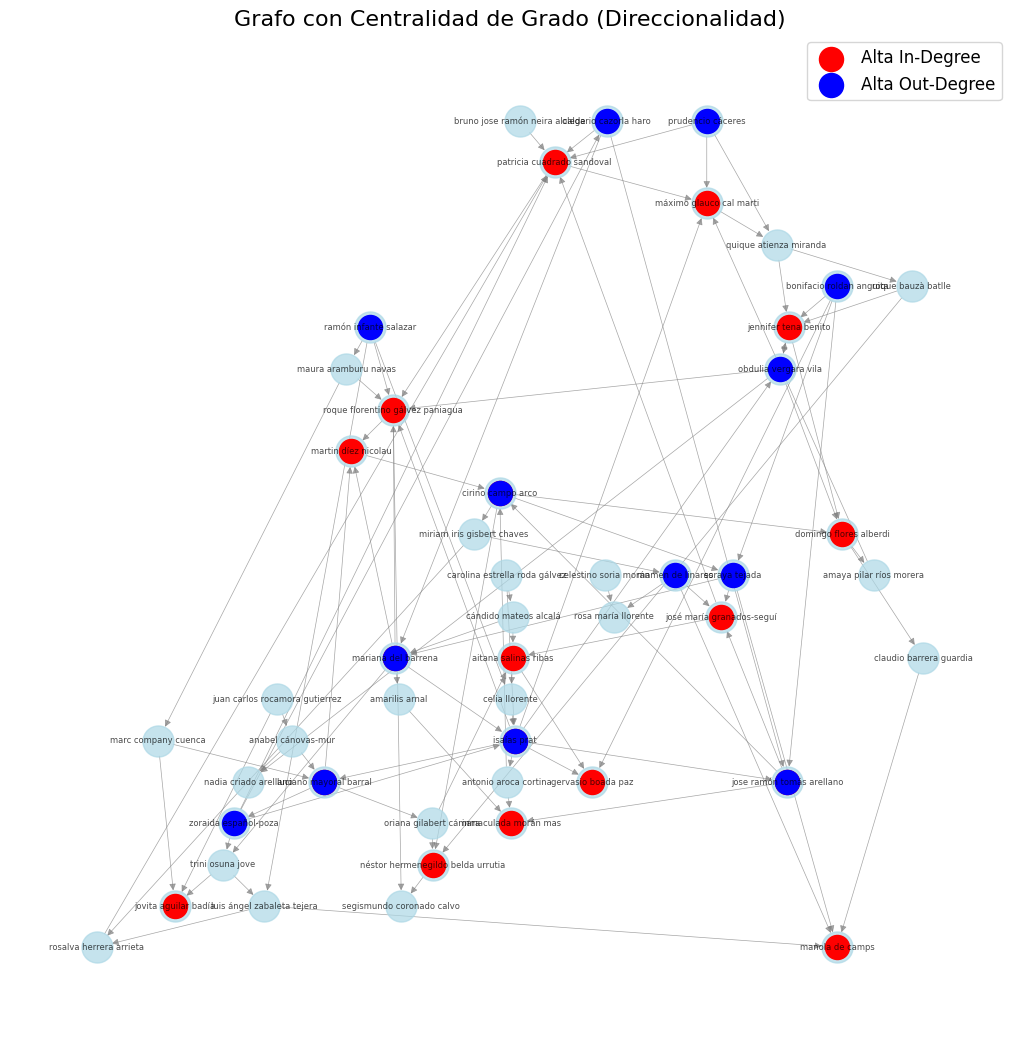

In [ ]:
# 1. Apply Harel-Koren-inspired layout using Graphviz
# We'll use the 'dot' engine, known for hierarchical layouts
try:
    pos_harel = nx.nx_agraph.graphviz_layout(G, prog="dot")
except ImportError:
    print("Error: Graphviz and pygraphviz are required for the Harel-Koren layout. Install them using:\n!apt install graphviz\n!pip install pygraphviz")
    # Fallback to spring layout if Graphviz is not installed
    pos_harel = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# 2. Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos_harel, with_labels=True,
        node_size=500, node_color="lightblue", edge_color="gray",
        font_size=6, width=0.5, alpha=0.7)

# Highlight nodes with high in-degree and out-degree
nx.draw_networkx_nodes(G, pos_harel, nodelist=[n for n, d in in_degree.items() if d > 2], node_color='red', label='Alta In-Degree')
nx.draw_networkx_nodes(G, pos_harel, nodelist=[n for n, d in out_degree.items() if d > 2], node_color='blue', label='Alta Out-Degree')

plt.title("Grafo con Centralidad de Grado (Direccionalidad)", fontsize=16)
plt.legend(fontsize=12)
plt.xticks([])
plt.yticks([])
plt.show()

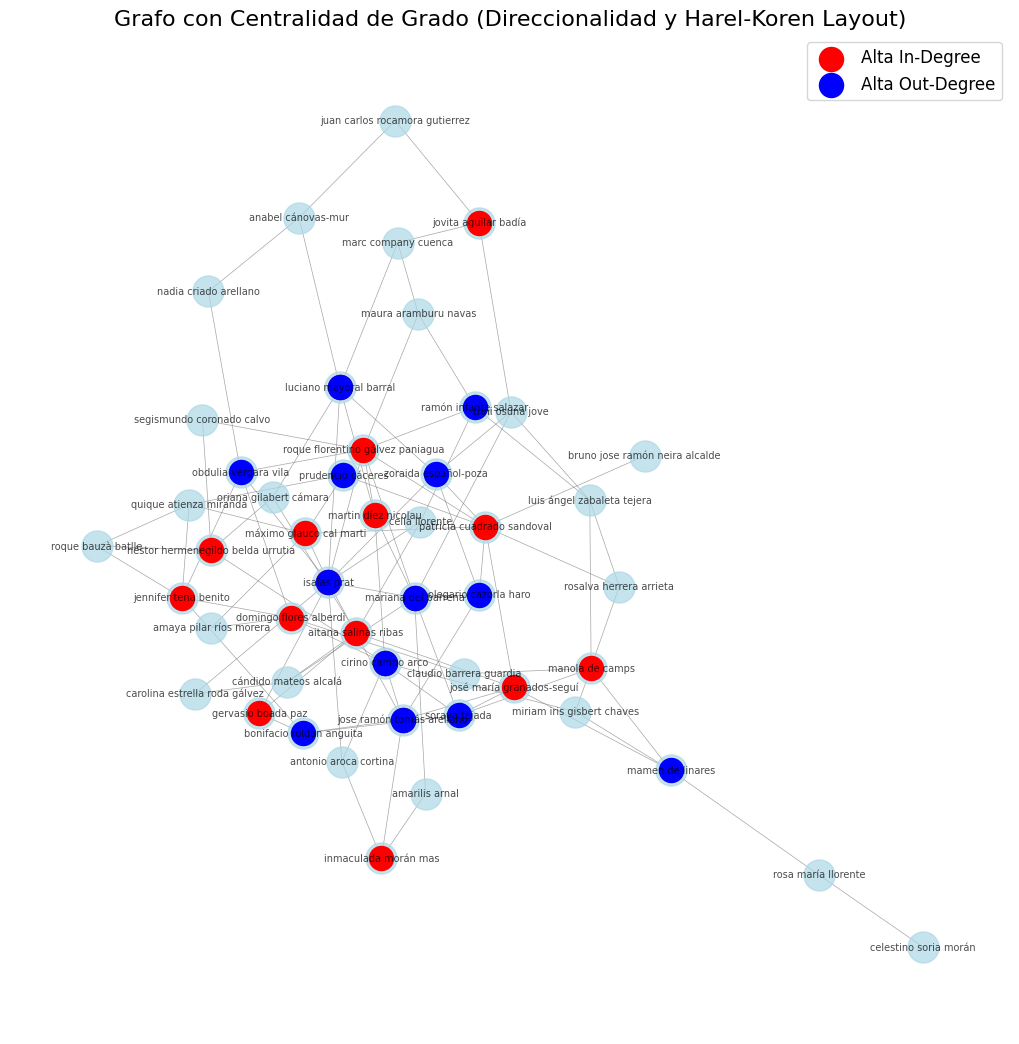

In [ ]:
# 1. Create undirected graph for bidirectional relationships
G_undirected = nx.Graph()
for u, v in G.edges():
    if G.has_edge(v, u):  # Check for bidirectional edge
        G_undirected.add_edge(u, v)  # Add to undirected graph
    else:
        G_undirected.add_edge(u, v) # Add as a directed edge if not bidirectional

# 2. Apply Harel-Koren layout
pos_harel = nx.spring_layout(G_undirected, k=0.1, iterations=50, seed=42)  # Adjust k and iterations

# 3. Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G_undirected, pos_harel, with_labels=True,
        node_size=500, node_color="lightblue", edge_color="gray",
        font_size=7, width=0.5, alpha=0.7)

# Highlight nodes with high in-degree and out-degree (using original directed graph)
nx.draw_networkx_nodes(G_undirected, pos_harel, nodelist=[n for n, d in in_degree.items() if d > 2], node_color='red', label='Alta In-Degree')
nx.draw_networkx_nodes(G_undirected, pos_harel, nodelist=[n for n, d in out_degree.items() if d > 2], node_color='blue', label='Alta Out-Degree')

plt.title("Grafo con Centralidad de Grado (Direccionalidad y Harel-Koren Layout)", fontsize=16)
plt.legend(fontsize=12)
plt.xticks([])
plt.yticks([])
plt.show()

**Actividad**

Usa diferentes colores y tamaños de nodos según su grado de centralidad.
Agregar etiquetas con métricas clave (in-degree, out-degree).
Probar diferentes algoritmos de diseño de grafos como Sugiyama o David Harel.

Averigua de qué se trata la medida de page rank, qué mide. Investiga un código para calcularla y representarla. Este será punto de quiz